In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

Values for survey_data were manually entered from the graph shown [here](https://www.pewresearch.org/global/database/indicator/24/country/us) and [here](https://www.pewresearch.org/global/2020/10/06/unfavorable-views-of-china-reach-historic-highs-in-many-countries/). Values for trade_data were manually entered from the data tables shown [here](https://www.census.gov/foreign-trade/balance/c5700.html). The ration of exports to imports were also manually calculated for each year.

In [2]:
#put survey data in a dataframe

# columns, year, percent americans who hold unfavorable views towards china

# each data point is going to be shifted back by one year. Since for the 2005 year, 
# we want the public opinion for 2006, and the trade deficit for 2005. That way,
# we can analyze the relationship between the trade deficit and public opinion
# accurately, since public opinion will only change after a certain period of lag
# after the initial event.

# initialize list of lists
# next, shift all years back by one

survey_data = [[2004, 35], [2005, 29], [2006, 39], [2007, 42], [2008, 38],
               [2009, 36], [2010, 36], [2011, 40], [2012, 52], [2013, 55], 
               [2014, 54], [2015, 55], [2016, 47], [2017, 47], [2018, 60], [2019, 73]]

# Create the pandas DataFrame
survey_df = pd.DataFrame(survey_data, columns = ['year', 'percent_unfav'])


In [3]:
# put trade data in a dataframe

# columns, year, trade deficit for the us with china

# may need to standardize this to account for things like inflation in the future

# in millions (on a nominal basis)

# initialize list of lists
trade_data = [[2004, -162254.3], [2005, -202278.1], [2006, -234101.3], [2007, -258506.0], [2008, -268039.8], [2009, -226877.2],
               [2010, -273041.6], [2011, -295249.7], [2012, -315102.5], [2013, -318683.8], [2014, -344817.7], 
               [2015, -367328.3], [2016, -346825.2], [2017, -375167.9], [2018, -418232.9], [2019, -344312.0]]

# Create the pandas DataFrame
trade_df = pd.DataFrame(trade_data, columns = ['year', 'balance'])

# convert balance into trade deficit (which is how much more the us is importing from china than exporting
trade_df['trade_deficit'] = trade_df['balance'] * -1


In [4]:
df = trade_df.merge(survey_df, on='year')



In [5]:
df

,year,balance,trade_deficit,percent_unfav
0,2004,-162254.3,162254.3,35
1,2005,-202278.1,202278.1,29
2,2006,-234101.3,234101.3,39
3,2007,-258506.0,258506.0,42
4,2008,-268039.8,268039.8,38
5,2009,-226877.2,226877.2,36
6,2010,-273041.6,273041.6,36
7,2011,-295249.7,295249.7,40
8,2012,-315102.5,315102.5,52
9,2013,-318683.8,318683.8,55


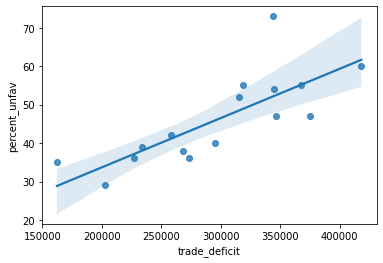

In [6]:
# plot data
sns.regplot(x='trade_deficit', y='percent_unfav', data=df);
# plt.xlabel('sepal width (cm)')

In [7]:
# can also look into percent change the previous year, and see if china's popularity more influenced by a big 
# increase in deficit

In [8]:
# measure correlation coefficient
df.loc[:, ['trade_deficit', 'percent_unfav']].corr(method='pearson')


,trade_deficit,percent_unfav
trade_deficit,1.000000,0.778956
percent_unfav,0.778956,1.000000


In [9]:
# evaluate the significance of the observed relationship between the two variables using a permutation test



In [10]:
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy().values #convert to numpy array, avoiding warning
    np.random.shuffle(permuted)
    return pd.Series(permuted) # convert back to pandas

In [11]:
def plot_model_line(df, model, x, is_resampled=True):
    '''
    Takes a dataframe and a fitted model
    Plots a line of best fit to the data
    '''
    if is_resampled:
        color="grey"
        alpha=0.1
    else:
        color="steelblue"
        alpha=0.7
    plt.plot(df[x], df[x] * model.coef_[0] + model.intercept_, color=color, alpha=alpha)

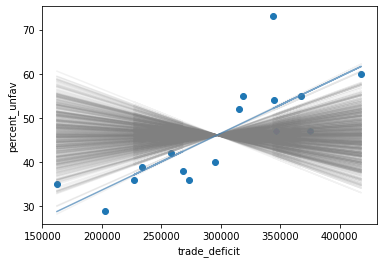

In [25]:
# plot true data
plt.scatter(df['trade_deficit'], df['percent_unfav'])

# plot 500 iterations of models on permuted data
for i in range(500):
    permuted_model = LinearRegression().fit(df[['trade_deficit']], permute(df['percent_unfav']))
    plot_model_line(df, permuted_model, 'trade_deficit')

# model true data and plot
model1 = LinearRegression().fit(df[['trade_deficit']], df['percent_unfav'])
plot_model_line(df, model1, 'trade_deficit', is_resampled=False)
plt.xlabel('trade_deficit')
plt.ylabel('percent_unfav')
plt.show()

In [24]:
# what fraction of permuted (null hyopthesis) slopes are greater than our observed slope?
steeper_slopes = 0
n_permutations = 1000
permuted_slopes = np.zeros(n_permutations) # preallocate array of correct size

for i in range(n_permutations):
    permuted_model = LinearRegression().fit(df[['trade_deficit']], permute(df['percent_unfav']))
    
    permuted_slopes[i] = permuted_model.coef_[0]
    
    if np.abs(permuted_model.coef_[0]) > np.abs(model1.coef_):
        steeper_slopes += 1
    
print(f'Fraction of permuted slopes more extreme than observed slopes: {steeper_slopes / n_permutations}')

Fraction of permuted slopes more extreme than observed slopes: 0.001
